# PublicDatasets (Analyser)

## 1. Re-reading

In [1]:
special_separator = '___'

In [2]:
import pandas as pd
import seaborn as sns 

import numpy as np
from urllib.parse import urlparse

In [3]:
mentions_table = pd.read_csv('data/DatasetMentions_Processed.csv',index_col=0, sep=';')

In [4]:
# mentions_table[mentions_table['Mention Style']=='URL']
mentions_table

,Venue,Paper Title,Dataset Identifier,Mention Style,Mention,Access,Notes
0,CHIL 2022,Data Augmentation for Electrocardiograms,MGH Dataset 1,Excluded,NaN,Private,data and code availability we use three\ndatas...
1,CHIL 2022,Data Augmentation for Electrocardiograms,MGH Dataset 2,Excluded,NaN,Private,NaN
2,CHIL 2022,Data Augmentation for Electrocardiograms,PTB-XL,Inline Citation,"wagner et al., 2020",Open,NaN
3,CHIL 2022,Data Augmentation for Electrocardiograms,[Repository] PhysioNet,Inline Citation,"goldberger et al., 2000",Open,Repository of dataset has been cited.
4,CHIL 2022,Data Augmentation for Electrocardiograms,[Paper Dataset],URL,https://github.com/aniruddhraghu/ecg_aug,Open,[Paper Dataset] indicates a paper’s own datase...
...,...,...,...,...,...,...,...
57,CHIL 2022,Identification of Subgroups With Similar Benef...,[Repository] PhysioNet,Inline Citation,"goldberger et al., 2000",Open,NaN
58,CHIL 2022,PhysioMTL: Personalizing Physiological Pattern...,AHMS,Inline Citation,"apple, 2019",Private,data and code availability the study in this\n...
59,CHIL 2022,PhysioMTL: Personalizing Physiological Pattern...,MMASH,Inline Citation,"rossi et al., 2020",Open,NaN
60,CHIL 2022,PhysioMTL: Personalizing Physiological Pattern...,MMASH,URL,https://github.com/rossialessio/mmash,Open,NaN


In [5]:
# color_palette=[
#     "#F5793A", "#A95AA1", "#85C0F9", "#0F2080"
# ]

# sns.set_palette(sns.color_palette("Set2"))

## 2. URL origin 

In [6]:
origins = [ urlparse(x).netloc if (style == 'URL' or style=='Footnote') and id!='[Paper Dataset]' else "" for x, style, id in zip(mentions_table['Mention'].tolist(), mentions_table['Mention Style'].tolist(), mentions_table['Dataset Identifier'].tolist() )]
   

mentions_table['Origin']=origins
#[mentions_table['Mention Style']=='URL']

# urlparse('http://www.example.test/foo/bar').netloc
mentions_table.head()

,Venue,Paper Title,Dataset Identifier,Mention Style,Mention,Access,Notes,Origin
0,CHIL 2022,Data Augmentation for Electrocardiograms,MGH Dataset 1,Excluded,NaN,Private,data and code availability we use three\ndatas...,
1,CHIL 2022,Data Augmentation for Electrocardiograms,MGH Dataset 2,Excluded,NaN,Private,NaN,
2,CHIL 2022,Data Augmentation for Electrocardiograms,PTB-XL,Inline Citation,"wagner et al., 2020",Open,NaN,
3,CHIL 2022,Data Augmentation for Electrocardiograms,[Repository] PhysioNet,Inline Citation,"goldberger et al., 2000",Open,Repository of dataset has been cited.,
4,CHIL 2022,Data Augmentation for Electrocardiograms,[Paper Dataset],URL,https://github.com/aniruddhraghu/ecg_aug,Open,[Paper Dataset] indicates a paper’s own datase...,


[Text(0.5, 1.0, 'Dataset Hosts (inline and footnote URLs)')]

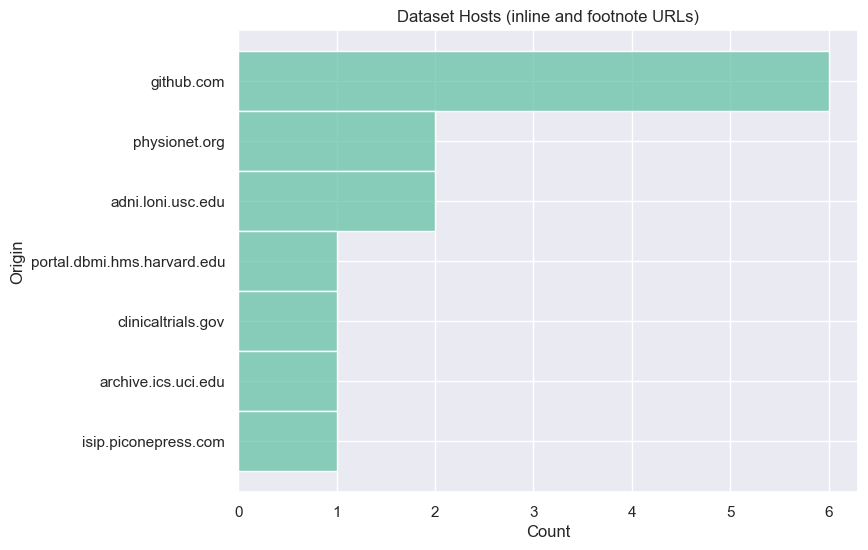

In [7]:
sns.set(rc={"figure.figsize":(8, 6)}, palette="Set2")
target = mentions_table[np.logical_and(
    np.logical_or(mentions_table['Mention Style']=='URL',mentions_table['Mention Style']=='Footnote'),
    mentions_table['Dataset Identifier']!='[Paper Dataset]')]
# target
sns.histplot(data=target, y="Origin", multiple="stack").set(title='Dataset Hosts (inline and footnote URLs)')

## 3. Check for combined

In [10]:
# # mentions_table['Origin'] 
# # mentions_table['Mention Style']



# # selection_table['Paper Title']
# selection_table['Dataset Identifier'].tolist()
# selection_table['Paper Title'].tolist()
selection_table = mentions_table.copy()
selection_table.groupby(['Paper Title','Dataset Identifier','Mention Style']).count()

Venue  \
Paper Title                                        Dataset Identifier Mention Style            
ADCB: An Alzheimer’s disease simulator for benc... ADNI               URL                  1   
                                                   ADNI Investigators Footnote             1   
                                                   [Paper Dataset]    URL                  1   
Context-Sensitive Spelling Correction of Clinic... CSpell             Inline Citation      1   
                                                   MIMIC-III          Inline Citation      1   
...                                                                                      ...   
Semi-Markov Offline Reinforcement Learning for ... [Paper Dataset]    URL                  1   
Uncertainty-Aware Text-to-Program for Question ... [Paper Dataset]    Footnote             1   
Unifying Heterogeneous Electronic Health Record... EICU               Inline Citation      1   
                                                   MIMIC-III          Inline Citation      1   
                                                   [Paper Dataset]    Footnote             1   

                                                                                       Mention  \
Paper Title                                        Dataset Identifier Mention Style              
ADCB: An Alzheimer’s disease simulator for benc... ADNI               URL                    1   
                                                   ADNI Investigators Footnote               1   
                                                   [Paper Dataset]    URL                    1   
Context-Sensitive Spelling Correction of Clinic... CSpell             Inline Citation        1   
                                                   MIMIC-III          Inline Citation        1   
...                                                                                        ...   
Semi-Markov Offline Reinforcement Learning for ... [Paper Dataset]    URL                    1   
Uncertainty-Aware Text-to-Program for Question ... [Paper Dataset]    Footnote               1   
Unifying Heterogeneous Electronic Health Record... EICU               Inline Citation        1   
                                                   MIMIC-III          Inline Citation        1   
                                                   [Paper Dataset]    Footnote               1   

                                                                                       Access  \
Paper Title                                        Dataset Identifier Mention Style             
ADCB: An Alzheimer’s disease simulator for benc... ADNI               URL                   1   
                                                   ADNI Investigators Footnote              1   
                                                   [Paper Dataset]    URL                   1   
Context-Sensitive Spelling Correction of Clinic... CSpell             Inline Citation       1   
                                                   MIMIC-III          Inline Citation       1   
...                                                                                       ...   
Semi-Markov Offline Reinforcement Learning for ... [Paper Dataset]    URL                   1   
Uncertainty-Aware Text-to-Program for Question ... [Paper Dataset]    Footnote              1   
Unifying Heterogeneous Electronic Health Record... EICU               Inline Citation       1   
                                                   MIMIC-III          Inline Citation       1   
                                                   [Paper Dataset]    Footnote              1   

                                                                                       Notes  \
Paper Title                                        Dataset Identifier Mention Style            
ADCB: An Alzheimer’s disease simulator for benc... ADNI               URL                  1   
             

<AxesSubplot:xlabel='Mention Style', ylabel='Dataset Identifier'>

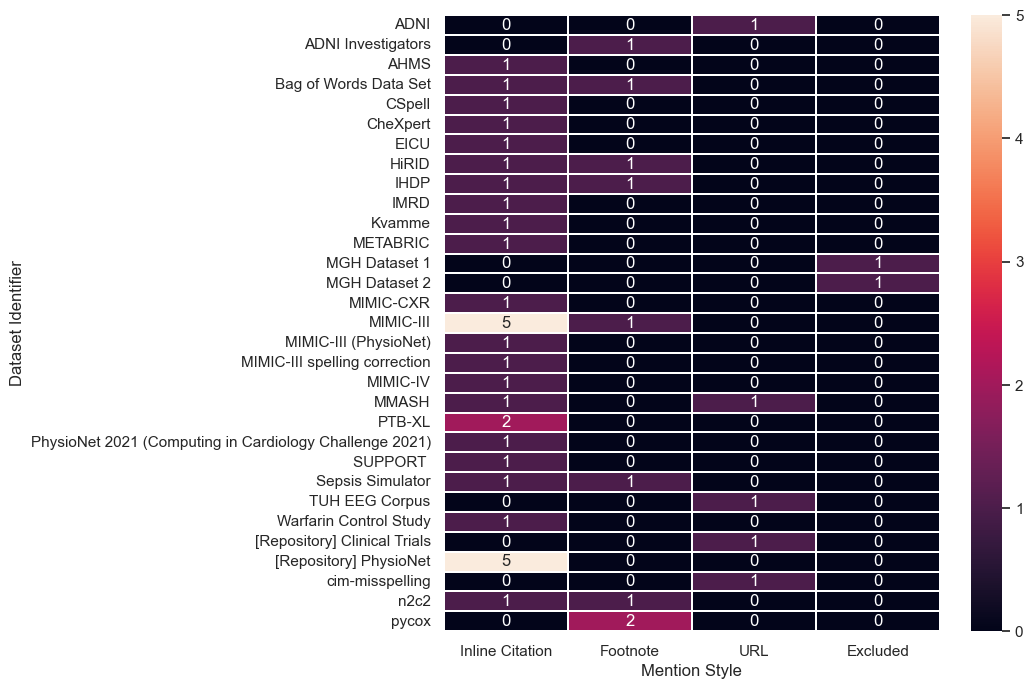

In [11]:
selection_table = mentions_table.copy()
# for row in selection_table.iterrows():
#     print(row)
selection_table = selection_table[selection_table['Dataset Identifier']!="[Paper Dataset]"]
sns.set(rc={"figure.figsize":(8, 8)})
d = pd.crosstab(selection_table['Dataset Identifier'],selection_table['Mention Style'] )
d = d.reindex(columns= ['Inline Citation','Footnote','URL','Excluded'])
sns.heatmap(d, annot=True, fmt="d", linewidths=0.1)


In [12]:
# sns.set(rc={"figure.figsize":(20, 3)})

## 4. Accesibility

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:254: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


[Text(0.5, 1.0, 'Mention Access')]

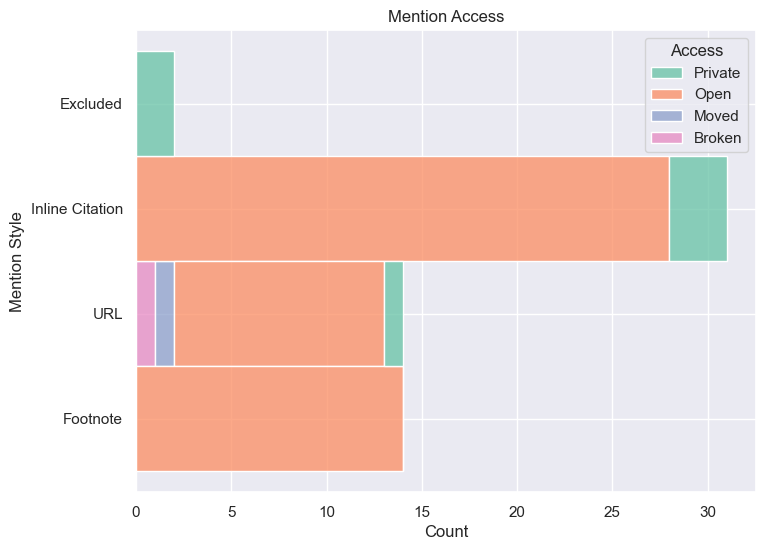

In [13]:
sns.set(rc={"figure.figsize":(8, 6)}, palette="Set2")
selection_table = mentions_table.copy()
# selection_table['Link Access'] = selection_table['Link Access'].fillna('Not Available')
sns.histplot(data=selection_table, y="Mention Style", hue="Access", multiple="stack").set(title='Mention Access')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:254: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


[Text(0.5, 1.0, 'Mention Access')]

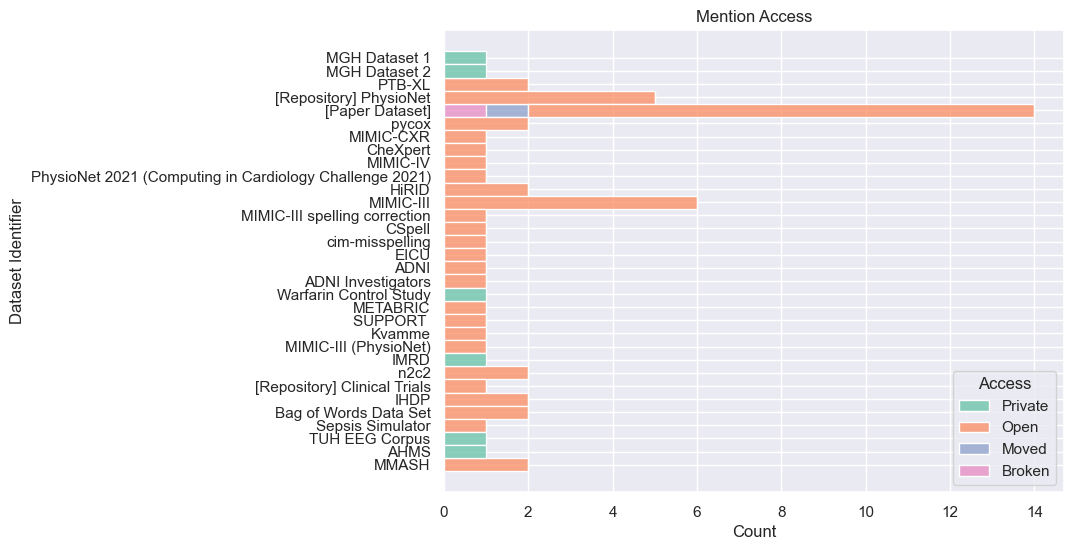

In [14]:
sns.set(rc={"figure.figsize":(8, 6)}, palette="Set2")
selection_table = mentions_table.copy()
# selection_table['Link Access'] = selection_table['Link Access'].fillna('Not Available')
sns.histplot(data=selection_table, y="Dataset Identifier", hue="Access", multiple="stack").set(title='Mention Access')

## 5. Dataset Identifier vs. Citation Style

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:254: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


[Text(0.5, 1.0, 'Datasets by how they were mentioned')]

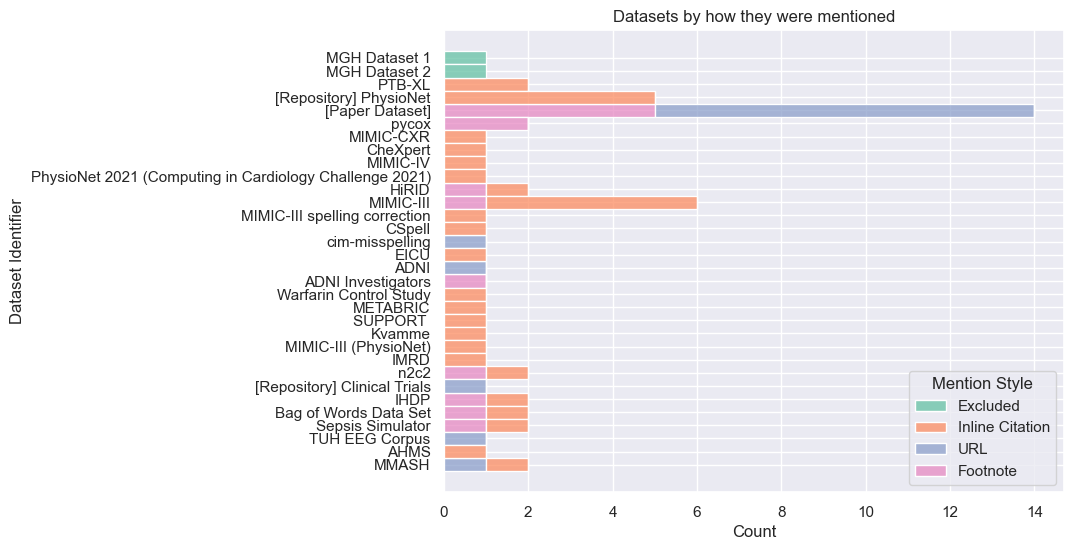

In [15]:
sns.set(rc={"figure.figsize":(8, 6)}, palette="Set2")
sns.histplot(data=mentions_table, y="Dataset Identifier", hue="Mention Style", multiple="stack").set(title='Datasets by how they were mentioned')

In [ ]:
sns.histplot(data=mentions_table, y="Venue", hue="Citation", multiple="stack")

In [ ]:
selection_table = mentions_table[mentions_table['Venue']=='CHIL 2021']
sns.histplot(data=selection_table, y="Citation", multiple="stack")